In [43]:
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys
sys.path.append("../")

### Tires and Conditions

In [196]:
tires = {"placeholder":{"long":None, "lat":None},
"hoosier_r25b_18x7-5_10x7_run1":{"long":None, "lat":None}}

camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
run_num = 1

### Import Tire Data

In [203]:
for name, tire in tires.items():
    try:
        df = pd.read_csv(f"../tire_data/processed_data/braking_{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["camber"] == camber) & (df["slip"] == slip_angle)]
        
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../tire_data/processed_data/cornering_{name}.csv")
        tire["lat"] = df[((df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["camber"] == camber))]

    except:
        print("Error getting lateral data for {0}".format(name))

### Round9 Data

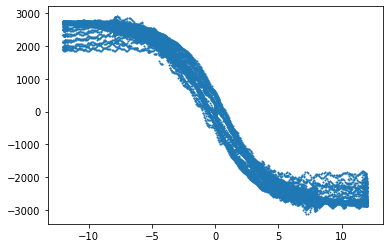

In [204]:
df = tires["placeholder"]["lat"]
temp_df = df[(df["load"] == -250 / 0.224809)]

# print(temp_df)

plt.scatter(temp_df["SA"], temp_df["FY"], s=1)

### Round6 Data

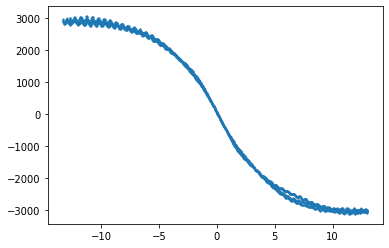

In [206]:
df = tires["hoosier_r25b_18x7-5_10x7_run1"]["lat"]
temp_df = df[(df["load"] == -250 / 0.224809)]

# print(temp_df)

plt.scatter(temp_df["SA"], temp_df["FY"], s=1)

### Round9 Data (Left) vs. Round6 Data (Right)

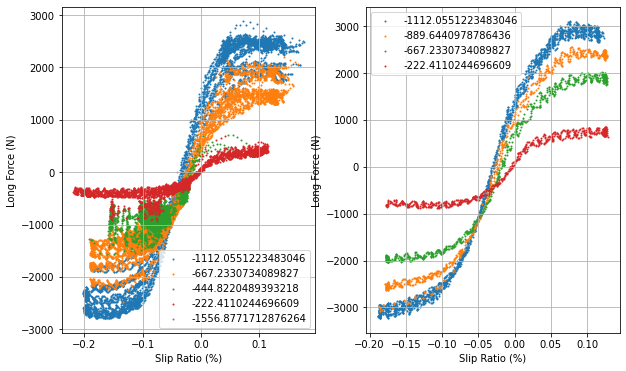

In [209]:
fig = plt.figure(figsize=(10,6))
count = 0
for name, tire in tires.items():
    if tire["long"] is not None:
        count += 1
        fig.add_subplot(1, 2, count)
        for load in tire["long"]["load"].unique():
            temp_df = tire["long"][tire["long"]["load"] == load]
            plt.scatter(temp_df["SR"], temp_df["FX"], label = load, s=1)
        plt.legend()
        plt.ylabel("Long Force (N)")
        plt.xlabel("Slip Ratio (%)")
        plt.grid(True)
plt.show()